# The Lorentz Equations

### Importing Libraries

In [142]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import sympy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import time
import random

## Runge Kutta order 4 for numerically integration 

In [3]:
# Defining the runge kutta order 4 (RK 4)
def RK4(func, dt, x_n, t_n):
    """
    function to perform a iterative step using runge kutta order 4 method to solve the ODE's
    
    t_n, x_n are the initial conditions and x_n1 is the next iterative step of the given function 'func'
    
    """
    f1 = func(x_n, t_n)
    f2 = func((x_n + (f1 * (dt / 2))), (t_n + (dt / 2)))
    f3 = func((x_n + (f2 * (dt / 2))), (t_n + (dt / 2)))
    f4 = func((x_n + (f3 * (dt))), (t_n + (dt)))
    x_n1 = x_n + ((dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4))
    
    return x_n1

## Lorentz system ODE's

In [2]:
# Lorentz Parameters
sigma = 10
beta = 8/3
rho = 28

In [143]:
def lorentz(x, t):
    """
    Function for lorentz system
    x is an array of [x, y, z]
    returns an array of x_dot which contains [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = x
    
    x_dot = [sigma * (y - x), (rho * x) - y - (x * z), (x * y) - (beta * z) ]
    
    return np.array(x_dot)
    

## 1. Stability and Bifurcation as a function of $\rho$

## 2. Strogatz 9.2.1

## 3. Numerical Integration of Lorentz System

A trajectory for the lorentz system is generated using RK4 integrator defined in above sections. The plot matches with the reference plot attached in the references.

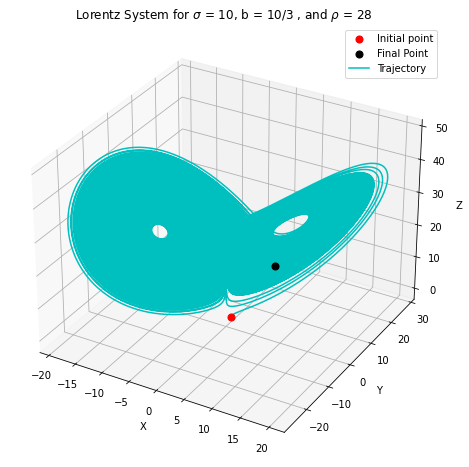

In [154]:
# Plotting trajectory for given initial condition
dt = 0.001 # time step
T = 1000 # Total time 
time_space = np.linspace(0, T, int(T / dt) + 1) 
x_arr = np.zeros((3,len(time_space))) # defining an array to store different points in the trajectory.
x_arr[:,0] = [1,0,0] #  defining the initial condition
x_in = x_arr[:,0]
for step,t in enumerate(time_space[0:-1]):
    x_dot = RK4(lorentz, dt, x_in, t)
    x_arr[:,step+1] = x_dot
    x_in = x_dot
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_arr[0,0],x_arr[1,0],x_arr[2,0],s=50, c='r') # Plotting initial poiunt
ax.scatter(x_arr[0,-1],x_arr[1,-1],x_arr[2,-1],s=50, c='k') # Plotting final trajectory point
ax.plot(x_arr[0,:],x_arr[1,:],x_arr[2,:],c='c') # Plotting all the points of trajectory
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(['Initial point','Final Point', 'Trajectory'])
ax.set_title(fr'Lorentz System for $\sigma$ = {round(sigma,2)}, b = 8/3 , and $\rho$ = {round(rho,2)} ')
plt.show()

## 4. Lyapunov Exponent



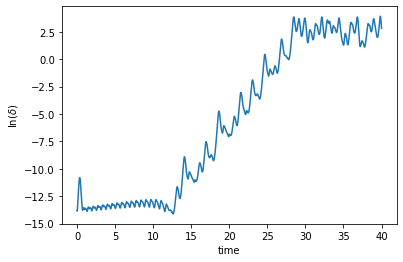

The maximum Lyapunov exponent for the lorentz system is 0.91


In [153]:
# Lyapunov Exponent
dt = 0.01 
T = 40
error = 0.000001
time_space = np.linspace(0, T, int(T / dt) + 1)
x_arr = np.zeros((3,len(time_space))) 
x_arr2 = np.zeros((3,len(time_space)))
x_arr[:,0] = [1,1,1] # initial condition
x_arr2[:,0] = [1+delta,1,1] # initial condition with the error term
x_in = x_arr[:,0]
x_in2 = x_arr2[:,0]
for step,t in enumerate(time_space[0:-1]):
    x_dot = RK4(lorentz, dt, x_in, t)
    x_arr[:,step+1] = x_dot
    x_in = x_dot
    x_dot2 = RK4(lorentz, dt, x_in2, t)
    x_arr2[:,step+1] = x_dot2
    x_in2 = x_dot2

x_arrT = x_arr.T
x_arr2T = x_arr2.T
delta_arr = np.linalg.norm(x_arrT- x_arr2T, axis=1)
plt.plot(time_space,np.log(delta_arr))
plt.xlabel('time')
plt.ylabel(r'ln($\delta$)')
plt.show()
slope, intercept = np.polyfit(time_space[1400:2700],np.log(delta_arr[1400:2700]), 1)
print(f"The maximum Lyapunov exponent for the lorentz system is {round(slope,2)}")

## 5. Limit cycle attractor for $\sigma$ = 10 , b = 8/3 , $\rho$ = 400 

A limit cycle in the trajectory and Oscillatory behaviour of x,y,z with time can be observed from the below plots

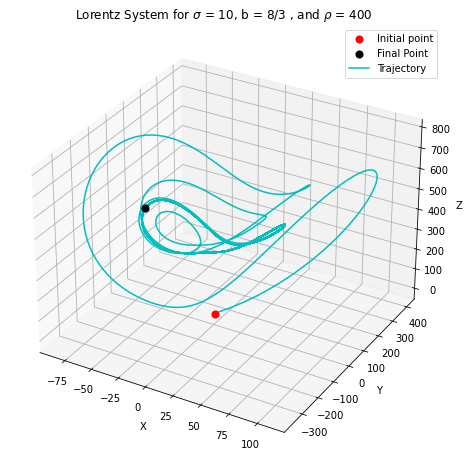

In [157]:
sigma = 10
beta = 8/3
rho = 400
# Plotting trajectory for given initial condition
dt = 0.001 # time step
T = 1000 # Total time 
time_space = np.linspace(0, T, int(T / dt) + 1) 
x_arr = np.zeros((3,len(time_space))) # defining an array to store different points in the trajectory.
x_arr[:,0] = [1,0,0] #  defining the initial condition
x_in = x_arr[:,0]
for step,t in enumerate(time_space[0:-1]):
    x_dot = RK4(lorentz, dt, x_in, t)
    x_arr[:,step+1] = x_dot
    x_in = x_dot
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_arr[0,0],x_arr[1,0],x_arr[2,0],s=50, c='r') # Plotting initial poiunt
ax.scatter(x_arr[0,-1],x_arr[1,-1],x_arr[2,-1],s=50, c='k') # Plotting final trajectory point
ax.plot(x_arr[0,:],x_arr[1,:],x_arr[2,:],c='c') # Plotting all the points of trajectory
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(['Initial point','Final Point', 'Trajectory'])
ax.set_title(fr'Lorentz System for $\sigma$ = {round(sigma,2)}, b = 8/3 , and $\rho$ = {round(rho,2)} ')
plt.show()

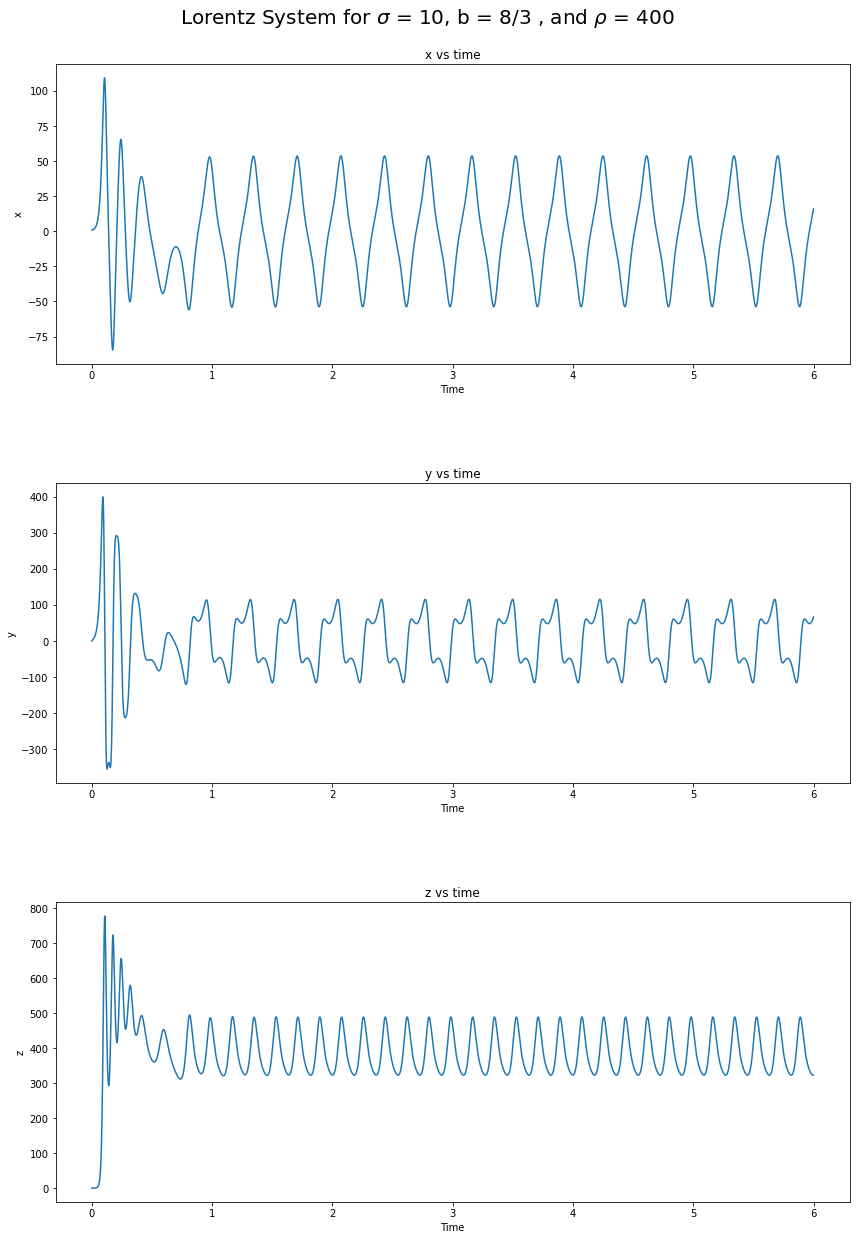

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
ax1.plot(time_space[0:6000], x_arr[0,:][0:6000])
ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.set_title('x vs time')

ax2.plot(time_space[0:6000], x_arr[1,:][0:6000])
ax2.set_xlabel('Time')
ax2.set_ylabel('y')
ax2.set_title('y vs time')

ax3.plot(time_space[0:6000], x_arr[2,:][0:6000])
ax3.set_xlabel('Time')
ax3.set_ylabel('z')
ax3.set_title('z vs time')

fig.suptitle(fr'Lorentz System for $\sigma$ = {round(sigma,2)}, b = 8/3 , and $\rho$ = {round(rho,2)} ', fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.94, bottom=0.15) 
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## 6. Full Lyapunov Spectrum

The sum of lyapunov exponents equate to = −1 − b − σ

## 7. Correlation dimmension

Correlation dimmension for random points along 1-D Interval 

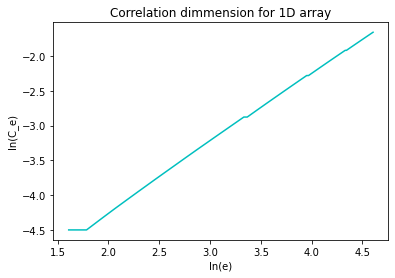

The correlation dimmension is 0.99


In [185]:
# Creating an array of 1D points in random
one_dim_array = np.array(random.sample(list(range(1,1000)), 900))
#one_dim_array = np.array(list(range(1,1000)))
e_1D = np.linspace(5,100,100)
C_e_1D = np.zeros(len(e_1D)) 
# calculating correlation dimmension for the given array.
for r_n, radius in enumerate(e_1D):
    N_e_1D = []
    for point in one_dim_array:
        n_points = np.where(((one_dim_array >= point - radius) & (one_dim_array <= point + radius)), 1, 0)
        N_e_1D.append(n_points)
    C_e_1D[r_n] = np.array(N_e_1D).mean()
        
#plt.plot(np.linspace(0.1,50,50),C_e1)
plt.plot(np.log(e_1D),np.log(C_e_1D),c = 'c')
plt.xlabel('ln(e)')
plt.ylabel('ln(C_e)')
plt.title('Correlation dimmension for 1D array')
plt.show()
slope, intercept = np.polyfit(np.log(e_1D),np.log(C_e_1D), 1)
print(f'The correlation dimmension is {round(slope,2)}')
    
    

Correlation dimmension for Lorentz System

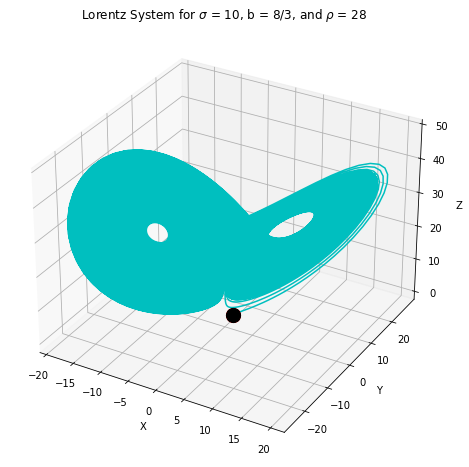

In [189]:
sigma = 10
beta = 8/3
rho = 28
# the radius space e
e = np.linspace(0,10,110)
# Plotting trajectory for a initial condition
dt = 0.01
T = 1500
time_space = np.linspace(0, T, int(T / dt) + 1)
x_arr = np.zeros((3,len(time_space)))
x_arr[:,0] = [1,1,1] # initial condition
x_in = x_arr[:,0]
for step,t in enumerate(time_space[0:-1]):
    x_dot = RK4(lorentz, dt, x_in, t)
    x_arr[:,step+1] = x_dot
    x_in = x_dot
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_arr[0,0],x_arr[1,0],x_arr[2,0],s=200, c='r') # Plotting initial poiunt
ax.scatter(x_arr[0,0],x_arr[1,0],x_arr[2,0],s=200, c='k') # Plotting final trajectory point
ax.plot(x_arr[0,:],x_arr[1,:],x_arr[2,:],c='c') # Plotting all the points iof trajectory
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(fr'Lorentz System for $\sigma$ = {round(sigma,2)}, b = 8/3, and $\rho$ = {round(rho,2)} ')
plt.show()

time for 150001_steps = 129.33601546287537
1696623437.1023746 1696623566.43839


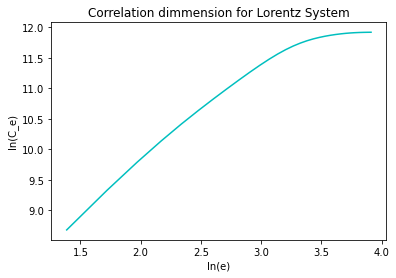

The correlation dimmension is 1.53


In [190]:
e = np.linspace(4,50,30)
C_e = np.zeros(len(e)) 
x_arrT = x_arr.T
n_dim,n_steps = x_arr.shape
random_sample = random.sample(list(range(1, n_steps + 1)), 1000)
#print(random_sample)
start_time = time.time()
for n_radius,radius in enumerate(e):
    # iterating over different radius sizes
    N_e = []
    # iterating over a random points to average the N_e values
    for j in random_sample:
        c_x,c_y,c_z = x_arr[:,j]
        n_points = np.where(((x_arrT[:,0]-c_x)**2 + (x_arrT[:,1]-c_y)**2 + (x_arrT[:,2]-c_z)**2) <= radius**2 , 1 , 0)
        N_e.append(n_points.sum())
    C_e[n_radius] = np.array(N_e).mean()
    
end_time = time.time()
print(f'time for {int(n_steps*1)}_steps = {end_time - start_time}')
print(start_time,end_time)
plt.plot(np.log(e),np.log(C_e),c = 'c')
plt.xlabel('ln(e)')
plt.ylabel('ln(C_e)')
plt.title('Correlation dimmension for Lorentz System')
plt.show()
slope, intercept = np.polyfit(np.log(e)[3:10], np.log(C_e)[3:10], 1)
print(f'The correlation dimmension is {round(slope,2)}')
        